<a href="https://colab.research.google.com/github/BrahmaTeja7/Dissertation_Research_Code/blob/main/Fake_News_Prediction_using_Count_Vectorizer_5fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries for finding the accuracy of the selected Machine learning models in predicting the fake news.**

In [ ]:
#Libraries for data manipulation
import numpy as np
import pandas as pd

#Libraries for text modification and preprocessing
import string
from sklearn.feature_extraction.text import CountVectorizer

#Libraries for Natural Language Processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')


# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Training the models
from sklearn.model_selection import train_test_split,  StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score, precision_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from scipy.stats import uniform, randint,expon
import time



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Loading the Dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv('/content/Fake&True_News.csv')

# **Preliminary Checks**

In [ ]:
dataset.shape

(44867, 5)

### **Shuffling the dataset row set records**

In [ ]:
shuffled_dataset = dataset.sample(frac=1.0)
print(shuffled_dataset)

                                                   title  \
38907  Voter confidence in UK handling of Brexit ebbs...   
29988  Ryan wins re-election as speaker of U.S. House...   
28587  Immigration judges exempt from Trump's federal...   
32850  Hacker who exposed Hillary Clinton's email ser...   
32840  'Little House' star drops bid for U.S. congres...   
...                                                  ...   
40051  Macron avoids 'lecturing' Egypt on rights, Sis...   
29749  German minister says EU, NATO nations concerne...   
26770  Comey account could fuel obstruction accusatio...   
43988  France discusses increased pressure on North K...   
1499    Trump Ignores Historically Low Rating, Brags ...   

                                                    text       subject  \
38907  LONDON (Reuters) - A record majority of Briton...     worldnews   
29988  WASHINGTON (Reuters) - U.S. Representative Pau...  politicsNews   
28587  (Reuters) - President Donald Trump’s federal h... 

### **Creating a new column "label" to convert the values of True or False to 0 & 1.**

In [ ]:
shuffled_dataset['label'] = np.where(shuffled_dataset['marker'] == True, 0, 1)
print(shuffled_dataset)

                                                   title  \
38907  Voter confidence in UK handling of Brexit ebbs...   
29988  Ryan wins re-election as speaker of U.S. House...   
28587  Immigration judges exempt from Trump's federal...   
32850  Hacker who exposed Hillary Clinton's email ser...   
32840  'Little House' star drops bid for U.S. congres...   
...                                                  ...   
40051  Macron avoids 'lecturing' Egypt on rights, Sis...   
29749  German minister says EU, NATO nations concerne...   
26770  Comey account could fuel obstruction accusatio...   
43988  France discusses increased pressure on North K...   
1499    Trump Ignores Historically Low Rating, Brags ...   

                                                    text       subject  \
38907  LONDON (Reuters) - A record majority of Briton...     worldnews   
29988  WASHINGTON (Reuters) - U.S. Representative Pau...  politicsNews   
28587  (Reuters) - President Donald Trump’s federal h... 

**Converting the text to lowercase**

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['text'].str.lower()
print(shuffled_dataset)

                                                   title  \
38907  Voter confidence in UK handling of Brexit ebbs...   
29988  Ryan wins re-election as speaker of U.S. House...   
28587  Immigration judges exempt from Trump's federal...   
32850  Hacker who exposed Hillary Clinton's email ser...   
32840  'Little House' star drops bid for U.S. congres...   
...                                                  ...   
40051  Macron avoids 'lecturing' Egypt on rights, Sis...   
29749  German minister says EU, NATO nations concerne...   
26770  Comey account could fuel obstruction accusatio...   
43988  France discusses increased pressure on North K...   
1499    Trump Ignores Historically Low Rating, Brags ...   

                                                    text       subject  \
38907  LONDON (Reuters) - A record majority of Briton...     worldnews   
29988  WASHINGTON (Reuters) - U.S. Representative Pau...  politicsNews   
28587  (Reuters) - President Donald Trump’s federal h... 

**Removing the Punctuations in the text**

In [ ]:
def removing_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_punctuations(x))
print(shuffled_dataset)

                                                   title  \
38907  Voter confidence in UK handling of Brexit ebbs...   
29988  Ryan wins re-election as speaker of U.S. House...   
28587  Immigration judges exempt from Trump's federal...   
32850  Hacker who exposed Hillary Clinton's email ser...   
32840  'Little House' star drops bid for U.S. congres...   
...                                                  ...   
40051  Macron avoids 'lecturing' Egypt on rights, Sis...   
29749  German minister says EU, NATO nations concerne...   
26770  Comey account could fuel obstruction accusatio...   
43988  France discusses increased pressure on North K...   
1499    Trump Ignores Historically Low Rating, Brags ...   

                                                    text       subject  \
38907  LONDON (Reuters) - A record majority of Briton...     worldnews   
29988  WASHINGTON (Reuters) - U.S. Representative Pau...  politicsNews   
28587  (Reuters) - President Donald Trump’s federal h... 

**Removing the stopwords in text column**

In [ ]:
Stopword = set(stopwords.words('english'))
def removing_stopwords(text):
  return " ".join([word for word in text.split() if word not in Stopword])

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_stopwords(x))
print(shuffled_dataset)

                                                   title  \
38907  Voter confidence in UK handling of Brexit ebbs...   
29988  Ryan wins re-election as speaker of U.S. House...   
28587  Immigration judges exempt from Trump's federal...   
32850  Hacker who exposed Hillary Clinton's email ser...   
32840  'Little House' star drops bid for U.S. congres...   
...                                                  ...   
40051  Macron avoids 'lecturing' Egypt on rights, Sis...   
29749  German minister says EU, NATO nations concerne...   
26770  Comey account could fuel obstruction accusatio...   
43988  France discusses increased pressure on North K...   
1499    Trump Ignores Historically Low Rating, Brags ...   

                                                    text       subject  \
38907  LONDON (Reuters) - A record majority of Briton...     worldnews   
29988  WASHINGTON (Reuters) - U.S. Representative Pau...  politicsNews   
28587  (Reuters) - President Donald Trump’s federal h... 

**Removing the special Characters, Html tags, Url in text column**

In [ ]:
def remove_chars_url_htmlTags(text):
  text = re.sub('[^a-zA-Z0-9]', ' ',text)
  text = re.sub('\s+', ' ',text)
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'<.*?>','',text)
  return text

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: remove_chars_url_htmlTags(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text
38907,Voter confidence in UK handling of Brexit ebbs...,LONDON (Reuters) - A record majority of Briton...,worldnews,07-Nov-17,True,0,london reuters record majority britons disappr...
29988,Ryan wins re-election as speaker of U.S. House...,WASHINGTON (Reuters) - U.S. Representative Pau...,politicsNews,03-Jan-17,True,0,washington reuters us representative paul ryan...
28587,Immigration judges exempt from Trump's federal...,(Reuters) - President Donald Trump’s federal h...,politicsNews,03-Mar-17,True,0,reuters president donald trump s federal hirin...
32850,Hacker who exposed Hillary Clinton's email ser...,WASHINGTON (Reuters) - A Romanian computer hac...,politicsNews,25-May-16,True,0,washington reuters romanian computer hacker re...
32840,'Little House' star drops bid for U.S. congres...,"(Reuters) - Melissa Gilbert, best known for pl...",politicsNews,25-May-16,True,0,reuters melissa gilbert best known playing lau...


**Checking the list of common words used in the dataset**

In [ ]:
from collections import Counter
word_count = Counter()
for text in shuffled_dataset['processing_text']:
  for word in text.split():
    word_count[word]+= 1

word_count.most_common(1000)

[('said', 129916),
 ('trump', 127445),
 ('us', 62760),
 ('s', 54953),
 ('would', 54736),
 ('president', 51795),
 ('people', 41065),
 ('one', 35213),
 ('state', 31967),
 ('also', 30851),
 ('new', 30677),
 ('reuters', 28764),
 ('donald', 27496),
 ('clinton', 27189),
 ('house', 27013),
 ('obama', 26905),
 ('government', 26657),
 ('states', 25935),
 ('republican', 24293),
 ('could', 23774),
 ('united', 23394),
 ('told', 23317),
 ('white', 22124),
 ('like', 21947),
 ('campaign', 21041),
 ('last', 20369),
 ('news', 19830),
 ('two', 19828),
 ('party', 19750),
 ('time', 19453),
 ('election', 19355),
 ('first', 18420),
 ('washington', 17706),
 ('former', 17572),
 ('year', 17451),
 ('even', 17424),
 ('country', 17404),
 ('many', 16227),
 ('hillary', 16134),
 ('years', 15878),
 ('security', 15545),
 ('may', 15343),
 ('say', 15179),
 ('national', 15123),
 ('political', 14975),
 ('made', 14825),
 ('media', 14820),
 ('get', 14680),
 ('law', 14628),
 ('police', 14505),
 ('make', 14489),
 ('court', 14

**Checking the list of rare words used in the dataset**

In [ ]:
Rare_words = set(word for (word, wc) in word_count.most_common()[:-100:-1])
Rare_words

{'07240',
 '07250',
 '100person',
 '1550497',
 '16650',
 '26456',
 '94page',
 'afpon',
 'aumfs',
 'bankrollers',
 'barrelling',
 'believethat',
 'byefelicia',
 'carefullylaid',
 'chairpriebus',
 'congressaccording',
 'coursenever',
 'customdesigned',
 'cx893',
 'democraticallyruled',
 'dilg',
 'distancewhile',
 'dmiss',
 'doomedwith',
 'doorstepread',
 'dzmm',
 'economyon',
 'egyptianorigin',
 'electedyou',
 'equalhe',
 'espina',
 'establishmentwell',
 'failsholt',
 'franciscohong',
 'fullhttpswwwyoutubecomwatchv8himytr04mfeatured',
 'giftbasket',
 'healthin',
 'helios',
 'hellenistic',
 'highdisagreements',
 'hittite',
 'iliana',
 'involvedwhat',
 'itmonths',
 'kasongo',
 'launchthe',
 'lcll',
 'lererlerer',
 'lessonaccording',
 'lessspecific',
 'logren',
 'louisclaude',
 'luxembourglondon',
 'mindignoring',
 'mshep08mike',
 'muffin',
 'opsgroup',
 'p2p001',
 'phoeniciantype',
 'pictwittercom220z5fjx4g',
 'pictwittercomdrlp6fw4vo',
 'pictwittercomvrtz6sgsuc',
 'platformcronyism',
 'pl

**Initializing Porter Stemmer function and applying stemming to reduce the text to their root word**

In [ ]:
port_stemming = PorterStemmer()

In [ ]:
def stemming(text):
  return " ".join([port_stemming.stem(word) for word in text.split()])

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['processing_text'].apply(lambda x: stemming(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text,stemmed_text
38907,Voter confidence in UK handling of Brexit ebbs...,LONDON (Reuters) - A record majority of Briton...,worldnews,07-Nov-17,True,0,london reuters record majority britons disappr...,london reuter record major briton disapprov pr...
29988,Ryan wins re-election as speaker of U.S. House...,WASHINGTON (Reuters) - U.S. Representative Pau...,politicsNews,03-Jan-17,True,0,washington reuters us representative paul ryan...,washington reuter us repres paul ryan reelect ...
28587,Immigration judges exempt from Trump's federal...,(Reuters) - President Donald Trump’s federal h...,politicsNews,03-Mar-17,True,0,reuters president donald trump s federal hirin...,reuter presid donald trump s feder hire freez ...
32850,Hacker who exposed Hillary Clinton's email ser...,WASHINGTON (Reuters) - A Romanian computer hac...,politicsNews,25-May-16,True,0,washington reuters romanian computer hacker re...,washington reuter romanian comput hacker revea...
32840,'Little House' star drops bid for U.S. congres...,"(Reuters) - Melissa Gilbert, best known for pl...",politicsNews,25-May-16,True,0,reuters melissa gilbert best known playing lau...,reuter melissa gilbert best known play laura i...





**Tokenizing the words in the text column**

In [ ]:
def token(text):
  return word_tokenize(text)

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['stemmed_text'].apply(lambda x: token(x))
print(shuffled_dataset)

                                                   title  \
38907  Voter confidence in UK handling of Brexit ebbs...   
29988  Ryan wins re-election as speaker of U.S. House...   
28587  Immigration judges exempt from Trump's federal...   
32850  Hacker who exposed Hillary Clinton's email ser...   
32840  'Little House' star drops bid for U.S. congres...   
...                                                  ...   
40051  Macron avoids 'lecturing' Egypt on rights, Sis...   
29749  German minister says EU, NATO nations concerne...   
26770  Comey account could fuel obstruction accusatio...   
43988  France discusses increased pressure on North K...   
1499    Trump Ignores Historically Low Rating, Brags ...   

                                                    text       subject  \
38907  LONDON (Reuters) - A record majority of Briton...     worldnews   
29988  WASHINGTON (Reuters) - U.S. Representative Pau...  politicsNews   
28587  (Reuters) - President Donald Trump’s federal h... 

**Removing unused columns from the dataset**





In [ ]:
shuffled_dataset = shuffled_dataset.drop(['date','marker'],axis=1)
shuffled_dataset

,title,text,subject,label,processing_text,stemmed_text
38907,Voter confidence in UK handling of Brexit ebbs...,LONDON (Reuters) - A record majority of Briton...,worldnews,0,london reuters record majority britons disappr...,"[london, reuter, record, major, briton, disapp..."
29988,Ryan wins re-election as speaker of U.S. House...,WASHINGTON (Reuters) - U.S. Representative Pau...,politicsNews,0,washington reuters us representative paul ryan...,"[washington, reuter, us, repres, paul, ryan, r..."
28587,Immigration judges exempt from Trump's federal...,(Reuters) - President Donald Trump’s federal h...,politicsNews,0,reuters president donald trump s federal hirin...,"[reuter, presid, donald, trump, s, feder, hire..."
32850,Hacker who exposed Hillary Clinton's email ser...,WASHINGTON (Reuters) - A Romanian computer hac...,politicsNews,0,washington reuters romanian computer hacker re...,"[washington, reuter, romanian, comput, hacker,..."
32840,'Little House' star drops bid for U.S. congres...,"(Reuters) - Melissa Gilbert, best known for pl...",politicsNews,0,reuters melissa gilbert best known playing lau...,"[reuter, melissa, gilbert, best, known, play, ..."
...,...,...,...,...,...,...
40051,"Macron avoids 'lecturing' Egypt on rights, Sis...",PARIS (Reuters) - French President Emmanuel Ma...,worldnews,0,paris reuters french president emmanuel macron...,"[pari, reuter, french, presid, emmanuel, macro..."
29749,"German minister says EU, NATO nations concerne...",BRUSSELS (Reuters) - Foreign ministers from NA...,politicsNews,0,brussels reuters foreign ministers nato europe...,"[brussel, reuter, foreign, minist, nato, europ..."
26770,Comey account could fuel obstruction accusatio...,NEW YORK (Reuters) - Former FBI Director James...,politicsNews,0,new york reuters former fbi director james com...,"[new, york, reuter, former, fbi, director, jam..."
43988,France discusses increased pressure on North K...,PARIS (Reuters) - France s Emmanuel Macron dis...,worldnews,0,paris reuters france emmanuel macron discussed...,"[pari, reuter, franc, emmanuel, macron, discus..."


**Creating Train and Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_dataset.text, shuffled_dataset.label, test_size=0.25)

In [ ]:
print('X_train:', X_train.shape,
      'X_test:', X_test.shape,
      'y_train:', y_train.shape,
      'y_test:', y_test.shape)


X_train: (33650,) X_test: (11217,) y_train: (33650,) y_test: (11217,)


**Applying CountVectorizer**

In [ ]:
bag_of_words = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
X_train_bow = bag_of_words.fit_transform(X_train.values)
#y_train = shuffled_dataset.label

In [ ]:
X_train_bow

<33650x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 7898286 stored elements in Compressed Sparse Row format>

**Creating Vocabulary to store the words**

In [ ]:
bow_vocabulary = bag_of_words.vocabulary_

In [ ]:
print(bow_vocabulary)

{'london': 2348, 'reuters': 3390, 'britain': 632, 'foreign': 1488, 'minister': 2502, 'johnson': 2165, 'said': 3453, 'he': 1699, 'was': 4720, 'not': 2649, 'going': 1584, 'to': 4353, 'resign': 3361, 'when': 4815, 'questioned': 3196, 'on': 2797, 'tuesday': 4560, 'following': 1450, 'reports': 3328, 'that': 3918, 'could': 959, 'before': 545, 'the': 3969, 'weekend': 4788, 'if': 1849, 'his': 1780, 'brexit': 626, 'demands': 1074, 'were': 4797, 'met': 2472, 'by': 669, 'prime': 3119, 'theresa': 4271, 'may': 2427, 'is': 2065, 'due': 1204, 'make': 2392, 'speech': 3726, 'friday': 1523, 'and': 253, 'daily': 1015, 'newspaper': 2621, 'reported': 3321, 'close': 833, 'friends': 1527, 'of': 2699, 'believe': 558, 'will': 4870, 'have': 1685, 'no': 2629, 'choice': 785, 'but': 654, 'walk': 4704, 'away': 482, 'she': 3611, 'advocates': 137, 'paying': 2961, 'for': 1454, 'access': 86, 'eu': 1298, 'single': 3658, 'market': 2417, 'speaking': 3721, 'in': 1883, 'new': 2608, 'york': 4978, 'asked': 419, 'reporters': 3

In [ ]:
print(X_train_bow[15].toarray())

# **Initializing the selected Machine learning models**

In [ ]:
svm_model = SVC()
nb_model = MultinomialNB()
xgb_model = xgb.XGBClassifier()

[[1 0 0 ... 0 0 0]]


# **Defining Hyperparameters for selected Machine learning algorithms**

In [ ]:
svm_param_distributions = {'C': uniform(0.7, 1), 'kernel': ['linear']}
nb_param_distributions = {'alpha': uniform(0.5, 10)}
xgb_param_distributions = {'n_estimators': randint(50, 100), 'max_depth': randint(3, 8)}

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# **Multinomial Naive Bayes**

In [ ]:
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=nb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

**Training the MNB**

In [ ]:
start_time_MNB_training = time.time()

random_search.fit(X_train_bow, y_train)

end_time_MNB_training = time.time()
elapsed_time_MNB_training = end_time_MNB_training - start_time_MNB_training


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(f"Time taken: {elapsed_time_MNB_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 2.1354782581329346 seconds
Best Parameters:  {'alpha': 0.5011437481734489}
Best Accuracy:  0.96


**Testing the MNB**

In [ ]:
start_time_MNB_testing = time.time()


X_test_bow = bag_of_words.transform(X_test)
y_pred = random_search.predict(X_test_bow)


accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Multinomial Naive Bayes :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_MNB_testing = time.time()
elapsed_time_MNB_testing = end_time_MNB_testing - start_time_MNB_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_MNB_testing} seconds")

Accuracy score for Multinomial Naive Bayes : 0.9595257198894535

******************************************************

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5391
           1       0.97      0.95      0.96      5826

    accuracy                           0.96     11217
   macro avg       0.96      0.96      0.96     11217
weighted avg       0.96      0.96      0.96     11217


******************************************************

Time taken: 13.626058101654053 seconds


**Confusion Matrix for MNB**

Confusion Matrix:
[[5231  160]
 [ 294 5532]]


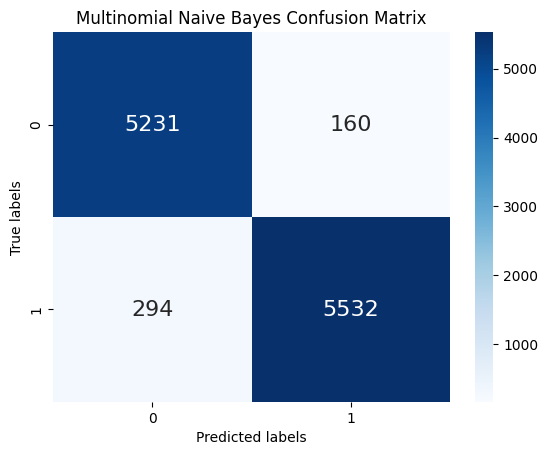

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Creating a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Multinomial Naive Bayes Confusion Matrix')

# Display the plot
plt.show()

**Printing the values of X_test variable**

In [ ]:
print(X_test_bow)

  (0, 99)	3
  (0, 213)	1
  (0, 215)	1
  (0, 253)	5
  (0, 325)	1
  (0, 434)	1
  (0, 562)	1
  (0, 610)	5
  (0, 635)	2
  (0, 697)	1
  (0, 953)	1
  (0, 1007)	1
  (0, 1057)	1
  (0, 1200)	1
  (0, 1285)	1
  (0, 1382)	1
  (0, 1454)	5
  (0, 1474)	1
  (0, 1478)	1
  (0, 1564)	2
  (0, 1810)	1
  (0, 1811)	1
  (0, 1883)	2
  (0, 1956)	1
  (0, 1975)	1
  :	:
  (11216, 4519)	1
  (11216, 4520)	1
  (11216, 4555)	1
  (11216, 4589)	1
  (11216, 4590)	1
  (11216, 4598)	1
  (11216, 4600)	1
  (11216, 4613)	2
  (11216, 4644)	1
  (11216, 4646)	1
  (11216, 4753)	1
  (11216, 4760)	1
  (11216, 4761)	1
  (11216, 4776)	1
  (11216, 4804)	1
  (11216, 4815)	1
  (11216, 4822)	1
  (11216, 4882)	1
  (11216, 4883)	1
  (11216, 4943)	2
  (11216, 4949)	1
  (11216, 4950)	1
  (11216, 4982)	4
  (11216, 4993)	1
  (11216, 4996)	3


**Prediction**

In [ ]:
X_predict = X_test_bow[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


In [ ]:
X_predict = X_test_bow[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


# **XGboost**

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

**Training XGBoost**

In [ ]:
start_time_xgb_training = time.time()

random_search.fit(X_train_bow, y_train)

end_time_xgb_training = time.time()
elapsed_time_xgb_training = end_time_xgb_training - start_time_xgb_training

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(f"Time taken: {elapsed_time_xgb_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 100.51682353019714 seconds
Best Parameters:  {'max_depth': 4, 'n_estimators': 62}
Best Accuracy:  0.9975928677563151


**Testing the XGboost**

In [ ]:
start_time_xgb_testing = time.time()

X_test_bow = bag_of_words.transform(X_test)
y_pred = random_search.predict(X_test_bow)

accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Xgboost :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_xgb_testing = time.time()
elapsed_time_xgb_testing = end_time_xgb_testing - start_time_xgb_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_xgb_testing} seconds")

Accuracy score for Xgboost : 0.997325488098422

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5391
           1       1.00      1.00      1.00      5826

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 13.648607969284058 seconds


**Confusion Matrix for XGboost**

Confusion Matrix:
[[5382    9]
 [  21 5805]]


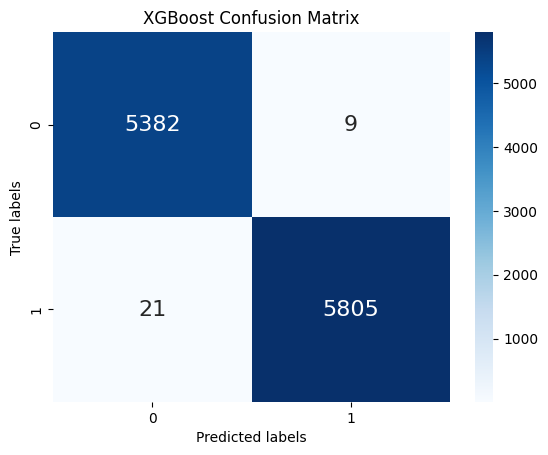

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Creating a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Setting labels and required title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost Confusion Matrix')

# Displaying the plot
plt.show()

**Printing the values of X_test**

In [ ]:
print(X_test_bow)

  (0, 99)	3
  (0, 213)	1
  (0, 215)	1
  (0, 253)	5
  (0, 325)	1
  (0, 434)	1
  (0, 562)	1
  (0, 610)	5
  (0, 635)	2
  (0, 697)	1
  (0, 953)	1
  (0, 1007)	1
  (0, 1057)	1
  (0, 1200)	1
  (0, 1285)	1
  (0, 1382)	1
  (0, 1454)	5
  (0, 1474)	1
  (0, 1478)	1
  (0, 1564)	2
  (0, 1810)	1
  (0, 1811)	1
  (0, 1883)	2
  (0, 1956)	1
  (0, 1975)	1
  :	:
  (11216, 4519)	1
  (11216, 4520)	1
  (11216, 4555)	1
  (11216, 4589)	1
  (11216, 4590)	1
  (11216, 4598)	1
  (11216, 4600)	1
  (11216, 4613)	2
  (11216, 4644)	1
  (11216, 4646)	1
  (11216, 4753)	1
  (11216, 4760)	1
  (11216, 4761)	1
  (11216, 4776)	1
  (11216, 4804)	1
  (11216, 4815)	1
  (11216, 4822)	1
  (11216, 4882)	1
  (11216, 4883)	1
  (11216, 4943)	2
  (11216, 4949)	1
  (11216, 4950)	1
  (11216, 4982)	4
  (11216, 4993)	1
  (11216, 4996)	3


**Prediction**

In [ ]:
X_predict = X_test_bow[1]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [ ]:
X_predict = X_test_bow[15]

prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


# **Support Vector Machine**

In [ ]:
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

**Training SVM**

In [ ]:
start_time_svm_training = time.time()

random_search.fit(X_train_bow, y_train)

end_time_svm_training = time.time()
elapsed_time_svm_training = end_time_svm_training - start_time_svm_training

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(f"Time taken: {elapsed_time_svm_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 3184.144679069519 seconds
Best Parameters:  {'C': 1.1170220047025738, 'kernel': 'linear'}
Best Accuracy:  0.995482912332838


**Testing SVM**

In [ ]:
start_time_svm_testing = time.time()

X_test_bow = bag_of_words.transform(X_test)
y_pred = random_search.predict(X_test_bow)

accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Support vector Machine :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))


end_time_svm_testing = time.time()
elapsed_time_svm_testing = end_time_svm_testing - start_time_svm_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_svm_testing} seconds")

Accuracy score for Support vector Machine : 0.9965231345279486

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5391
           1       1.00      1.00      1.00      5826

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 53.33251667022705 seconds


**Confusion Matrix for SVM**

Confusion Matrix:
[[5377   14]
 [  25 5801]]


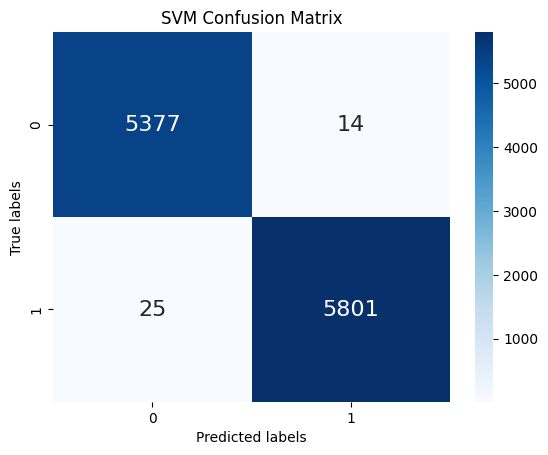

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')

# Display the plot
plt.show()

**Printing the X_test Values**

In [ ]:
print(X_test_bow)

  (0, 99)	3
  (0, 213)	1
  (0, 215)	1
  (0, 253)	5
  (0, 325)	1
  (0, 434)	1
  (0, 562)	1
  (0, 610)	5
  (0, 635)	2
  (0, 697)	1
  (0, 953)	1
  (0, 1007)	1
  (0, 1057)	1
  (0, 1200)	1
  (0, 1285)	1
  (0, 1382)	1
  (0, 1454)	5
  (0, 1474)	1
  (0, 1478)	1
  (0, 1564)	2
  (0, 1810)	1
  (0, 1811)	1
  (0, 1883)	2
  (0, 1956)	1
  (0, 1975)	1
  :	:
  (11216, 4519)	1
  (11216, 4520)	1
  (11216, 4555)	1
  (11216, 4589)	1
  (11216, 4590)	1
  (11216, 4598)	1
  (11216, 4600)	1
  (11216, 4613)	2
  (11216, 4644)	1
  (11216, 4646)	1
  (11216, 4753)	1
  (11216, 4760)	1
  (11216, 4761)	1
  (11216, 4776)	1
  (11216, 4804)	1
  (11216, 4815)	1
  (11216, 4822)	1
  (11216, 4882)	1
  (11216, 4883)	1
  (11216, 4943)	2
  (11216, 4949)	1
  (11216, 4950)	1
  (11216, 4982)	4
  (11216, 4993)	1
  (11216, 4996)	3


**Prediction**

In [ ]:
X_predict = X_test_bow[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


In [ ]:
X_predict = X_test_bow[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


## **Comparison of models for accuracy using ROC graph**

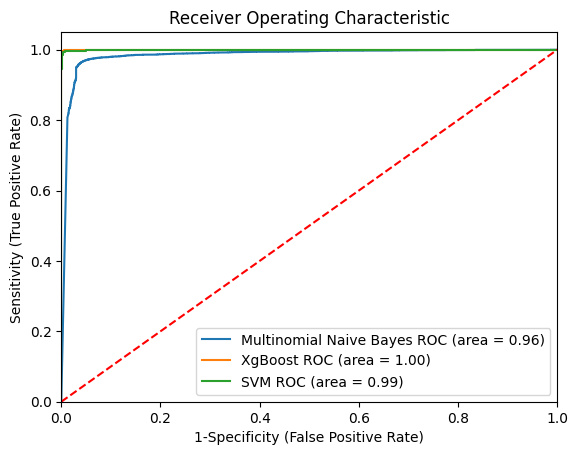

In [ ]:
plt.figure()

# adding the models
models = [
    {
        'label': 'Multinomial Naive Bayes',
        'model': MultinomialNB(),
    },
    {
        'label': 'XgBoost',
        'model': xgb.XGBClassifier(),
    },
    {
        'label': 'SVM',
        'model': SVC(probability=True),  # Setting probability=True for SVC
    }
]

# for loop for iterating through model dictionary
for m in models:
    model = m['model']  # selecting the model
    model.fit(X_train_bow, y_train)  # training the model
    y_pred = model.predict(X_test_bow)  # predicting the test data

    # Computing False positive rate, and True positive rate
    if hasattr(model, "predict_proba"):
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_bow)[:, 1])
    else:
        # For models that don't have predict_proba, use the decision function
        decision_values = model.decision_function(X_test_bow)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, decision_values)

    # Calculating Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Plotting the graph
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))


plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  # Display

# **Comparing the training time and testing among selected models**

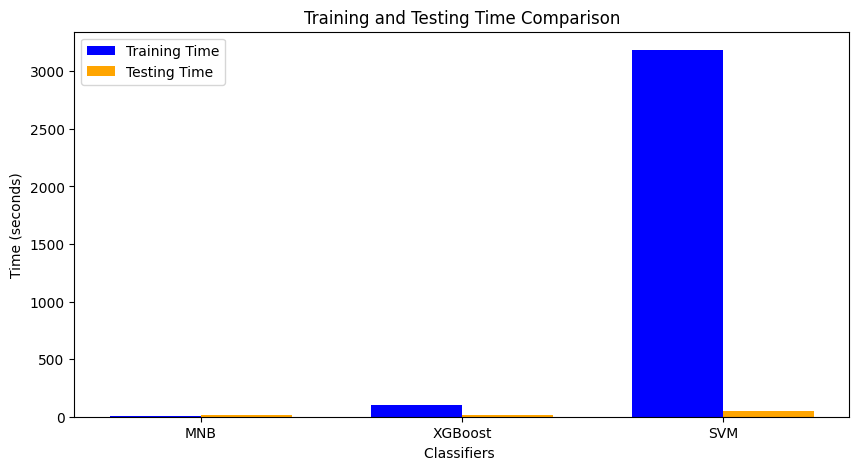

In [ ]:
models = ['MNB', 'XGBoost', 'SVM']
training_times = [elapsed_time_MNB_training, elapsed_time_xgb_training, elapsed_time_svm_training]  # getting the values of training time and testing taken by each model
testing_times = [elapsed_time_MNB_testing,elapsed_time_xgb_testing,elapsed_time_svm_testing]

# Plotting both training and testing times in the same plot
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 5))
plt.bar(index, training_times, width=bar_width, color='blue', label='Training Time')
plt.bar(index + bar_width, testing_times, width=bar_width, color='orange', label='Testing Time')
plt.xlabel('Classifiers ')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()